In [148]:
import pandas as pd
import ast

In [149]:
max_min = 1669.6895
min = 85.19250000000002

In [150]:
scale_list = ['train_predict','train_label','validation_predict','validation_label']
all_list = ['train_loss','test_loss'] + scale_list

In [151]:
model_name = 'qRNN'

In [124]:
"""
qRNN_cls = pd.read_csv(f'./result_data/cRNN_fixed_data.csv')
qRNN_cls = qRNN_cls.applymap(lambda x: 0 if pd.isna(x) else x)
qRNN_KAN = pd.read_csv(f'./result_data/{model_name}_KAN_data.csv')
qRNN_KAN = qRNN_KAN.applymap(lambda x: 0 if pd.isna(x) else x)
qRNN_QNE = pd.read_csv(f'./result_data/{model_name}_NQE(KAN)_cor_data.csv')
qRNN_QNE = qRNN_QNE.applymap(lambda x: 0 if pd.isna(x) else x)
qRNN_fixed = pd.read_csv(f'./result_data/{model_name}_fixed_data.csv')
qRNN_fixed = qRNN_fixed.applymap(lambda x: 0 if pd.isna(x) else x)"""

C:\Users\pop75\AppData\Local\Temp\ipykernel_22584\200235007.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  qRNN_cls = qRNN_cls.applymap(lambda x: 0 if pd.isna(x) else x)
C:\Users\pop75\AppData\Local\Temp\ipykernel_22584\200235007.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  qRNN_KAN = qRNN_KAN.applymap(lambda x: 0 if pd.isna(x) else x)
C:\Users\pop75\AppData\Local\Temp\ipykernel_22584\200235007.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  qRNN_QNE = qRNN_QNE.applymap(lambda x: 0 if pd.isna(x) else x)
C:\Users\pop75\AppData\Local\Temp\ipykernel_22584\200235007.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  qRNN_fixed = qRNN_fixed.applymap(lambda x: 0 if pd.isna(x) else x)


In [152]:

qRNN_QNE = pd.read_csv(f'./result_data/qRNN_NQE_data.csv')
qRNN_QNE = qRNN_QNE.applymap(lambda x: 0 if pd.isna(x) else x)

C:\Users\pop75\AppData\Local\Temp\ipykernel_22584\3521169628.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  qRNN_QNE = qRNN_QNE.applymap(lambda x: 0 if pd.isna(x) else x)


In [153]:
import numpy as np
def get_data(model,train_loader,test_loader):
    pred_list = []
    train_label_list = []
    test_pred_list = []
    test_label_list = []
    for data,label in train_loader:
        pred = model(data)
        pred_list.append(pred.detach().numpy())
        train_label_list.append(label.numpy())
    for data,label in test_loader:
        pred = model(data)
        test_pred_list.append(pred.detach().numpy())
        test_label_list.append(label.numpy())

    return list(np.concatenate(pred_list).reshape(-1)),list(np.concatenate(train_label_list).reshape(-1)),list(np.concatenate(test_pred_list).reshape(-1)),list(np.concatenate(test_label_list).reshape(-1))

In [154]:
def decoding(data,cor=False):
    result_data = pd.DataFrame(data)
    print(data[scale_list])
    if cor:
        result_data[scale_list] = data[scale_list]*max_min+min
        return result_data
            
    else:
        result_data[scale_list] = data[scale_list]*max_min/6.28+min
        return result_data

In [157]:
import matplotlib.pyplot as plt
#scaled_data_KAN = decoding(qRNN_KAN)
scaled_data_QNE = decoding(qRNN_QNE,True)
#scaled_data_fixed = decoding(qRNN_fixed)
#scaled_data_cls = decoding(qRNN_cls)
scaled_data_QNE.to_csv(f'./result_decoding/qRNN_NQE_data.csv')
#scaled_data_KAN.to_csv(f'./result_decoding/{model_name}_KAN_data.csv')
#scaled_data_fixed.to_csv(f'./result_decoding/{model_name}_fixed_data.csv')

     train_predict  train_label  validation_predict  validation_label
0         0.530004     0.606849            0.530004          0.606849
1         0.649800     0.690162            0.649800          0.690162
2         0.674145     0.762879            0.674145          0.762879
3         0.683662     0.824691            0.683662          0.824691
4         0.538152     0.449366            0.538152          0.449366
..             ...          ...                 ...               ...
495       0.000000     0.000000            0.000000          0.000000
496       0.000000     0.000000            0.000000          0.000000
497       0.000000     0.000000            0.000000          0.000000
498       0.000000     0.000000            0.000000          0.000000
499       0.000000     0.000000            0.000000          0.000000

[500 rows x 4 columns]


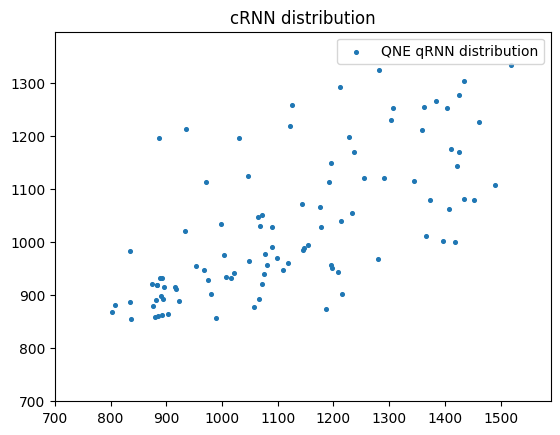

In [159]:
plt.title('cRNN distribution')
#plt.scatter(scaled_data_KAN['train_label'],scaled_data_KAN['train_predict'],label='KAN qRNN distribution', s=7)
plt.scatter(scaled_data_QNE['train_label'],scaled_data_QNE['train_predict'],label='QNE qRNN distribution', s=7)
#plt.scatter(scaled_data_fixed['train_label'],scaled_data_fixed['train_predict'],label=' qRNN distribution', s=7)
#plt.scatter(scaled_data_fixed['train_label'],scaled_data_fixed['train_label'],label='ideal', s=5)
plt.xlim(700)
plt.ylim(700)
plt.legend()

In [131]:
from sklearn.metrics import mean_squared_error
KAN_MSE = mean_squared_error(scaled_data_KAN['validation_label'],scaled_data_KAN['validation_predict'])
QNE_MSE = mean_squared_error(scaled_data_QNE['validation_label'],scaled_data_QNE['validation_predict'])
fixed_MSE = mean_squared_error(scaled_data_fixed['validation_label'],scaled_data_fixed['validation_predict'])
#cls_MSE = mean_squared_error(scaled_data_cls['validation_label'],scaled_data_cls['validation_predict'])

In [160]:
QNE_MSE = mean_squared_error(scaled_data_QNE['validation_label'],scaled_data_QNE['validation_predict'])
print(QNE_MSE)

6197.514235876422
